/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Results: {'Precision': 0.37343734890517705, 'Recall': 0.40480132450331124, 'F1-score': 0.3074595716184395}
Ridge Regression Results: {'Precision': 0.6375138083681477, 'Recall': 0.6423841059602649, 'F1-score': 0.6264549416753912}


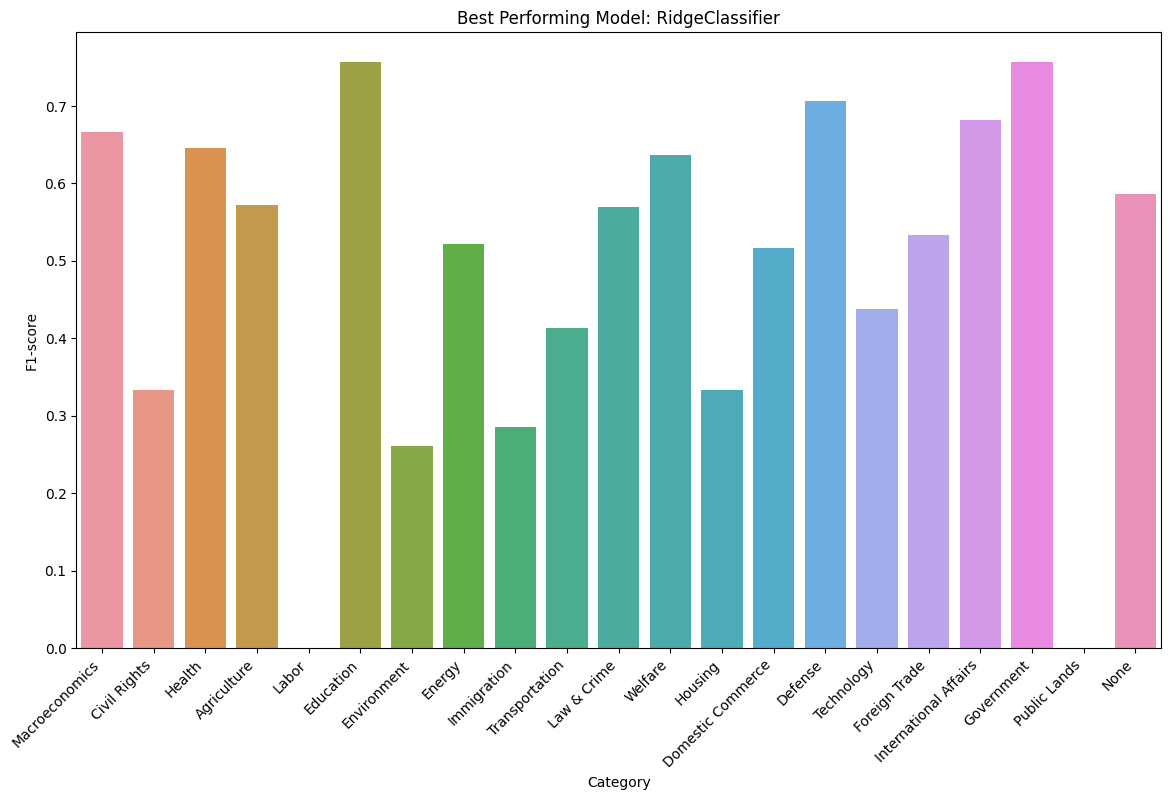

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/nytimes.csv"
data = pd.read_csv(file_path)

# In this step I had to handle the missing values in the dataset
data = data.dropna(subset=['text'])

category_names = {
    0: "Macroeconomics",
    1: "Civil Rights",
    2: "Health",
    3: "Agriculture",
    4: "Labor",
    5: "Education",
    6: "Environment",
    7: "Energy",
    8: "Immigration",
    9: "Transportation",
    10: "Law & Crime",
    11: "Welfare",
    12: "Housing",
    13: "Domestic Commerce",
    14: "Defense",
    15: "Technology",
    16: "Foreign Trade",
    17: "International Affairs",
    18: "Government",
    19: "Public Lands",
    20: "None"
}

# As my first step after the preparation I split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# In the next step I vectorized the text data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

# Next I trained the Naive Bayes model and the Ridge regression model
nb_model = MultinomialNB()
nb_model.fit(X_train, train_data['label'])
nb_predictions = nb_model.predict(X_test)

ridge_model = RidgeClassifier()
ridge_model.fit(X_train, train_data['label'])
ridge_predictions = ridge_model.predict(X_test)

# The next step was to evaluate and compare the models
def evaluate_model(predictions, true_labels):
    precision, recall, f1, _ = metrics.precision_recall_fscore_support(true_labels, predictions, average='weighted')
    return {'Precision': precision, 'Recall': recall, 'F1-score': f1}

nb_results = evaluate_model(nb_predictions, test_data['label'])
ridge_results = evaluate_model(ridge_predictions, test_data['label'])

print("Naive Bayes Results:", nb_results)
print("Ridge Regression Results:", ridge_results)

# In the final step was to isualize the per-category results for the best-performing model
best_model = nb_model if nb_results['F1-score'] > ridge_results['F1-score'] else ridge_model
best_predictions = nb_predictions if nb_results['F1-score'] > ridge_results['F1-score'] else ridge_predictions

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=list(category_names.values()), y=metrics.precision_recall_fscore_support(test_data['label'], best_predictions, average=None)[2], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title(f'Best Performing Model: {type(best_model).__name__}')
ax.set_xlabel('Category')
ax.set_ylabel('F1-score')
plt.show()